## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

#### Load problem constants

In [2]:
alphafile = "../data/alpha-tula9.jld"
d = get_pomdp()
g = get_grid(d.pomdp.states)

RectangleGrid with 866133 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [3]:
# gen_pairwise_policy(d)
alpha = read_alpha(alphafile)

866134x36 Array{Float64,2}:
 -36.0     -30.0     -28.0     -30.0     …  -12.0     -18.0     -1.92408e-6 
 -36.0     -30.0     -28.0     -30.0        -12.0     -18.0     -4.86188e-6 
 -36.0     -30.0     -28.0     -30.0        -12.0     -18.0     -8.27159e-6 
 -36.0026  -30.0     -28.0     -30.0        -12.0     -18.0     -1.35401e-5 
 -36.0047  -30.0     -28.0     -30.0        -12.0     -18.0     -2.25079e-5 
 -36.0083  -30.0     -28.0     -30.0     …  -12.0     -18.0012  -3.86471e-5 
 -36.011   -30.0     -28.0     -30.0        -12.0     -18.0015  -6.90071e-5 
 -36.0137  -30.0     -28.0     -30.0        -12.0     -18.0019  -0.000128462
 -36.0165  -30.0008  -28.0     -30.0        -12.0     -18.0024  -0.00024962 
 -36.0198  -30.0028  -28.0     -30.0        -12.0     -18.0031  -0.000506711
 -36.0235  -30.0047  -28.0     -30.0     …  -12.0     -18.0039  -0.00107909 
 -36.028   -30.0082  -28.0     -30.0        -12.0003  -18.0051  -0.00244064 
 -36.0332  -30.012   -28.0     -30.0        -12.

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:10.0:360.0)

Slider{Float64}([Input{Float64}] 15.0,"v0",15.0,10.0:5.0:20.0)

Slider{Float64}([Input{Float64}] 15.0,"v1",15.0,10.0:5.0:20.0)

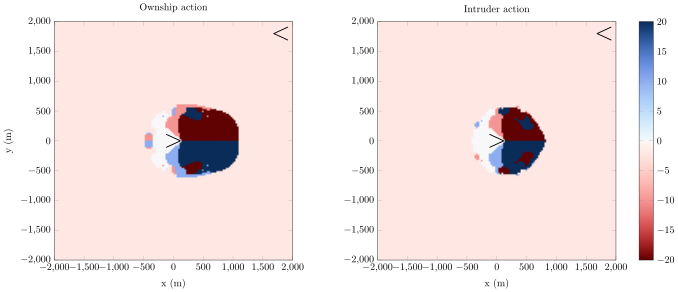

In [4]:
viz_pairwise_policy(d, alpha)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-min policy, and that `iutilFn = 2` corresponds to the max-sum policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

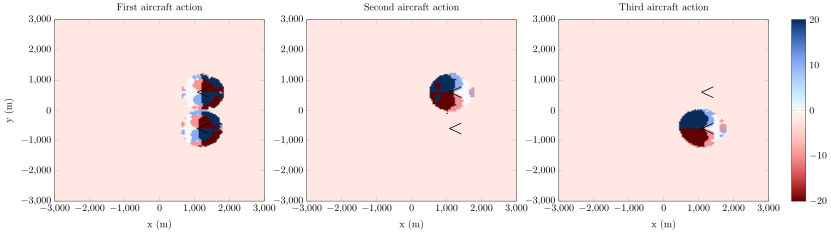

In [5]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 3.442e+00 ms

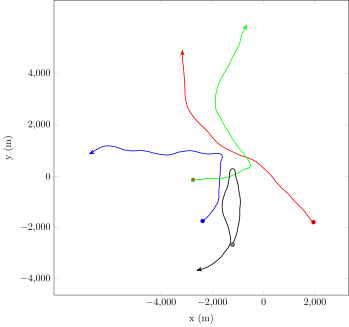

In [6]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [7]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 1.70e+01 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [1989,1987,1982,1984,1986]
maxsum nlms bool: [0,0,0,0,0]
maxsum alerts: [1984,1990,1988,1991,1981]
nuavs = 3: cputime = 2.99e+01 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [2970,2973,2963,2973,2969]
maxsum nlms bool: [0,1,0,4,1]
maxsum alerts: [2954,2965,2966,2949,2964]
nuavs = 4: cputime = 4.64e+01 sec
maxmin nlms bool: [1,0,1,5,2]
maxmin alerts: [3934,3936,3897,3886,3915]
maxsum nlms bool: [4,1,2,7,4]
maxsum alerts: [3879,3936,3877,3865,3894]
nuavs = 5: cputime = 6.51e+01 sec
maxmin nlms bool: [0,0,5,12,3]
maxmin alerts: [4887,4872,4836,4805,4882]
maxsum nlms bool: [5,5,3,15,7]
maxsum alerts: [4851,4872,4874,4781,4829]
Results saved to ../data/results-1.jld
